In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data_label.csv')
data

,gender,race,international_stu,technical_skill,reading_score,Teamwork,Empathy_skills,Self-control,Ability_to_compromise,Ability_to_teach,Respect_for_others,Openness_to_Criticism,Sensitivity_and_Tact,Gaining_trust,Comfort_with_Differences,Listening_Skills,label
0,female,Hispanic and Latino,domestic,no,4,87,80,97,75,99,77,91,72,92,76,78,1
1,male,white,domestic,no,2,85,73,83,79,75,64,76,75,74,84,82,2
2,male,white,domestic,no,1,89,63,87,87,95,88,72,70,81,90,99,1
3,male,white,domestic,no,1,80,74,77,89,82,79,93,76,89,72,76,2
4,female,black,domestic,yes,4,66,92,70,78,88,89,77,67,78,75,78,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,male,white,domestic,no,4,76,82,82,91,79,84,77,78,84,82,77,1
999996,female,asian,domestic,no,3,81,85,85,78,88,85,93,82,68,62,77,3
999997,female,Hispanic and Latino,domestic,no,5,85,79,65,77,100,69,91,88,87,70,85,1
999998,female,white,domestic,no,4,68,85,84,70,73,84,80,83,71,85,66,2


In [3]:
df = pd.get_dummies(data=data,columns=['gender','international_stu','technical_skill','race'],drop_first=False)
df

,reading_score,Teamwork,Empathy_skills,Self-control,Ability_to_compromise,Ability_to_teach,Respect_for_others,Openness_to_Criticism,Sensitivity_and_Tact,Gaining_trust,...,gender_male,international_stu_domestic,international_stu_international,technical_skill_no,technical_skill_yes,race_Hispanic and Latino,race_asian,race_black,race_others,race_white
0,4,87,80,97,75,99,77,91,72,92,...,0,1,0,1,0,1,0,0,0,0
1,2,85,73,83,79,75,64,76,75,74,...,1,1,0,1,0,0,0,0,0,1
2,1,89,63,87,87,95,88,72,70,81,...,1,1,0,1,0,0,0,0,0,1
3,1,80,74,77,89,82,79,93,76,89,...,1,1,0,1,0,0,0,0,0,1
4,4,66,92,70,78,88,89,77,67,78,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4,76,82,82,91,79,84,77,78,84,...,1,1,0,1,0,0,0,0,0,1
999996,3,81,85,85,78,88,85,93,82,68,...,0,1,0,1,0,0,1,0,0,0
999997,5,85,79,65,77,100,69,91,88,87,...,0,1,0,1,0,1,0,0,0,0
999998,4,68,85,84,70,73,84,80,83,71,...,0,1,0,1,0,0,0,0,0,1


In [4]:
group = data.groupby('label').race.count()
group

label
0     42053
1    368249
2    395124
3     57313
4    137261
Name: race, dtype: int64

In [94]:
interpersonality = data.drop(columns = ['gender', 'race', 'international_stu', 'technical_skill'])
check = lambda x : x > 80
check_reading = lambda x: x >= 3
High_interpersonality = check(interpersonality)
High_interpersonality['label'] = interpersonality['label']
High_interpersonality['reading_score'] = check_reading(interpersonality.reading_score)
High_interpersonality

,reading_score,Teamwork,Empathy_skills,Self-control,Ability_to_compromise,Ability_to_teach,Respect_for_others,Openness_to_Criticism,Sensitivity_and_Tact,Gaining_trust,Comfort_with_Differences,Listening_Skills,label
0,True,True,False,True,False,True,False,True,False,True,False,False,1
1,False,True,False,True,False,False,False,False,False,False,True,True,2
2,False,True,False,True,True,True,True,False,False,True,True,True,1
3,False,False,False,False,True,True,False,True,False,True,False,False,2
4,True,False,True,False,False,True,True,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,True,False,True,True,True,False,True,False,False,True,True,False,1
999996,True,True,True,True,False,True,True,True,True,False,False,False,3
999997,True,True,False,False,False,True,False,True,True,True,False,True,1
999998,True,False,True,True,False,False,True,False,True,False,True,False,2


In [162]:
interpersonality_True_table = pd.pivot_table(High_interpersonality, values=['reading_score','Teamwork','Empathy_skills','Self-control','Ability_to_compromise',\
                    'Ability_to_teach','Respect_for_others','Openness_to_Criticism','Sensitivity_and_Tact',\
                             'Gaining_trust','Comfort_with_Differences','Listening_Skills'],\
                    index=['label'],
                    aggfunc= np.sum) #{np.sum,np.size} interpersonality_table = interpersonality_table.reset_index()
interpersonality_True_table = interpersonality_True_table.reset_index()
interpersonality_True_table

,label,Ability_to_compromise,Ability_to_teach,Comfort_with_Differences,Empathy_skills,Gaining_trust,Listening_Skills,Openness_to_Criticism,Respect_for_others,Self-control,Sensitivity_and_Tact,Teamwork,reading_score
0,0,20003,19993,20014,20302,20035,19856,20085,19906,20095,19986,20037,31650
1,1,205624,203147,217486,205294,208332,215813,213044,204632,204851,209674,198394,298472
2,2,159242,161608,147658,159784,157089,149760,151523,160589,160880,154901,165702,273822
3,3,27241,27169,27295,27486,27137,27307,27431,27513,27354,27308,27408,43014
4,4,65893,65856,65715,65996,65400,65169,65481,65314,65213,65617,66092,103123


In [167]:
interpersonality_table.Ability_to_compromise.iloc[:,0] #Size: Total people in this cluster

Cluster_num = {0:'42053', 1:'368249', 2:'395124', 3:'57313', 4:'137261'}
Cluster_num.values

<function dict.values>

In [173]:
interpersonality_True_table

interpersonality_percentile_table.

,label,Ability_to_compromise,Ability_to_teach,Comfort_with_Differences,Empathy_skills,Gaining_trust,Listening_Skills,Openness_to_Criticism,Respect_for_others,Self-control,Sensitivity_and_Tact,Teamwork,reading_score
0,0,20003,19993,20014,20302,20035,19856,20085,19906,20095,19986,20037,31650
1,1,205624,203147,217486,205294,208332,215813,213044,204632,204851,209674,198394,298472
2,2,159242,161608,147658,159784,157089,149760,151523,160589,160880,154901,165702,273822
3,3,27241,27169,27295,27486,27137,27307,27431,27513,27354,27308,27408,43014
4,4,65893,65856,65715,65996,65400,65169,65481,65314,65213,65617,66092,103123


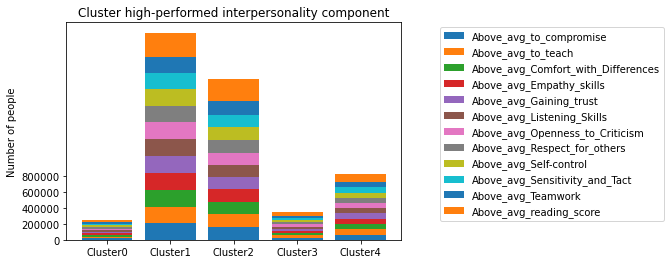

In [195]:
#Visualization for interpersonality

x = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
y1 = interpersonality_True_table.iloc[:,1] #Above_avg_to_compromise
y2 = interpersonality_True_table.iloc[:,2] #Above_avg_to_teach    
y3 = interpersonality_True_table.iloc[:,3] #Above_avg_Comfort_with_Differences
y4 = interpersonality_True_table.iloc[:,4] #Above_avg_Empathy_skills
y5 = interpersonality_True_table.iloc[:,5] #Above_avg_Gaining_trust
y6 = interpersonality_True_table.iloc[:,6] #Above_avg_Listening_Skills
y7 = interpersonality_True_table.iloc[:,7] #Above_avg_Openness_to_Criticism   
y8 = interpersonality_True_table.iloc[:,8] #Above_avg_Respect_for_others
y9 = interpersonality_True_table.iloc[:,9] #Above_avg_Self-control
y10 = interpersonality_True_table.iloc[:,10] #Above_avg_Sensitivity_and_Tact
y11 = interpersonality_True_table.iloc[:,11] #Above_avg_Teamwork
y12 = interpersonality_True_table.iloc[:,12] #Above_avg_reading_score

# plot stacked bar chart 
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.bar(x, y3, bottom=y1+y2)
plt.bar(x, y4, bottom=y1+y2+y3)
plt.bar(x, y5, bottom=y1+y2+y3+y4)
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5)
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6)
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7)
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8)
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9)
plt.bar(x, y11, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10)
plt.bar(x, y12, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11)


plt.ylabel('Number of people')
plt.title('Cluster high-performed interpersonality component')

plt.yticks(np.arange(0, 1000000, 200000))
plt.legend( ('Above_avg_to_compromise', 'Above_avg_to_teach', 'Above_avg_Comfort_with_Differences', 'Above_avg_Empathy_skills', 
             'Above_avg_Gaining_trust','Above_avg_Listening_Skills', 'Above_avg_Openness_to_Criticism',
            'Above_avg_Respect_for_others', 'Above_avg_Self-control', 'Above_avg_Sensitivity_and_Tact',
            'Above_avg_Teamwork', 'Above_avg_reading_score'), bbox_to_anchor=(1.8, 1.0), loc='upper right' )

plt.show()

In [5]:
table = pd.pivot_table(data, values=['gender','reading_score','Teamwork','Empathy_skills','Self-control','Ability_to_compromise',\
                    'Ability_to_teach','Respect_for_others','Openness_to_Criticism','Sensitivity_and_Tact',\
                             'Gaining_trust','Comfort_with_Differences','Listening_Skills'],\
                    index=['label'],
                    aggfunc=[np.mean])
table

mean                                            \
      Ability_to_compromise Ability_to_teach Comfort_with_Differences   
label                                                                   
0                 79.983449        79.963855                79.973724   
1                 81.796646        81.645875                82.517951   
2                 78.323946        78.453316                77.679799   
3                 79.966413        79.951686                79.988449   
4                 80.039705        80.028887                80.012509   

                                                                           \
      Empathy_skills Gaining_trust Listening_Skills Openness_to_Criticism   
label                                                                       
0          80.055525     79.959099        79.934701             79.973605   
1          81.768819     81.953531        82.391594             82.243124   
2          78.357468     78.205723        77.801799             77.902031   
3          79.999354     79.971315        79.973968             80.013819   
4          80.040776     79.988620        79.917180             79.972687   

                                                                       \
      Respect_for_others Self-control Sensitivity_and_Tact   Teamwork   
label                                                                   
0              79.972178    80.019808            79.988063  79.966162   
1              81.734085    81.728483            82.032763  81.371447   
2              78.395466    78.421556            78.081516  78.702035   
3              80.019716    79.977265            80.012039  79.978138   
4              79.958451    79.958903            79.974144  80.069167   

                     
      reading_score  
label                
0          3.174993  
1          3.361991  
2          2.988391  
3          3.170450  
4          3.173021

In [ ]:
#

In [6]:
table2 = pd.pivot_table(df, values=['gender_male','gender_female'],\
                    index=['label'],
                    aggfunc=np.sum)
table2

,gender_female,gender_male
label,,
0,21022.0,21031.0
1,145166.0,223083.0
2,235950.0,159174.0
3,28680.0,28633.0
4,68665.0,68596.0


In [29]:
table2.iloc[:,0]

label
0     21022.0
1    145166.0
2    235950.0
3     28680.0
4     68665.0
Name: gender_female, dtype: float64

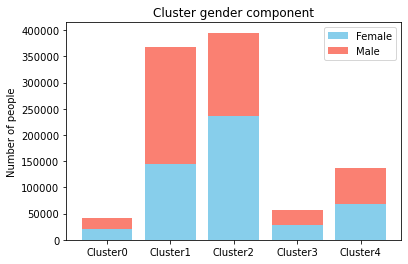

In [31]:
#Visualization for gender 

x = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
y1 = table2.iloc[:,0] #Female
y2 = table2.iloc[:,1] #Male


# plot stacked bar chart 
plt.bar(x, y1, color='skyblue')
plt.bar(x, y2, bottom=y1, color='salmon')


plt.ylabel('Number of people')
plt.title('Cluster gender component')

plt.legend( ('Female', 'Male') )
plt.show()

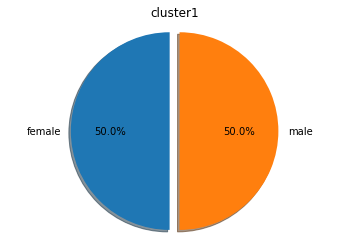

In [32]:
labels = 'female', 'male'
sizes = [table2.iloc[0,0], table2.iloc[0,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('cluster1')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [11]:
table3 = pd.pivot_table(df, values=['race_Hispanic and Latino','race_asian','race_black','race_others','race_white'],\
                    index=['label'],
                    aggfunc=np.sum)
table3

,race_Hispanic and Latino,race_asian,race_black,race_others,race_white
label,,,,,
0,0.0,0.0,0.0,42053.0,0.0
1,65744.0,0.0,9.0,0.0,302496.0
2,107260.0,14.0,314.0,0.0,287536.0
3,0.0,57313.0,0.0,0.0,0.0
4,7163.0,0.0,130088.0,0.0,10.0


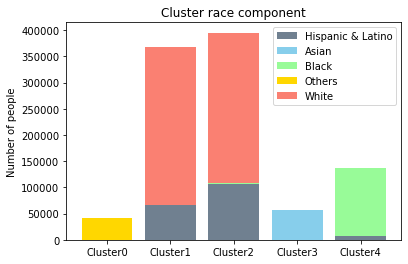

In [28]:
#Visualization for race 

x = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
y1 = table3.iloc[:,0] #race_Hispanic and Latino
y2 = table3.iloc[:,1] #race_asian
y3 = table3.iloc[:,2] #race_black
y4 = table3.iloc[:,3] #race_others
y5 = table3.iloc[:,4] #race_white

# plot stacked bar chart 
plt.bar(x, y1, color='slategrey')
plt.bar(x, y2, bottom=y1, color='skyblue')
plt.bar(x, y3, bottom=y1+y2, color='palegreen')
plt.bar(x, y4, bottom=y1+y2+y3, color='gold')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='salmon')


plt.ylabel('Number of people')
plt.title('Cluster race component')

#plt.yticks(np.arange(0, 110000, 100000))
plt.legend( ('Hispanic & Latino', 'Asian', 'Black', 'Others', 'White') )
plt.show()

In [22]:
table3.iloc[0,:] #hisoanic and latino

race_Hispanic and Latino        0.0
race_asian                      0.0
race_black                      0.0
race_others                 42053.0
race_white                      0.0
Name: 0, dtype: float64

In [35]:
table4 = pd.pivot_table(df, values=['technical_skill_no','technical_skill_yes'],\
                    index=['label'],
                    aggfunc=np.sum)
table4

,technical_skill_no,technical_skill_yes
label,,
0,33611.0,8442.0
1,258593.0,109656.0
2,351341.0,43783.0
3,45898.0,11415.0
4,110177.0,27084.0


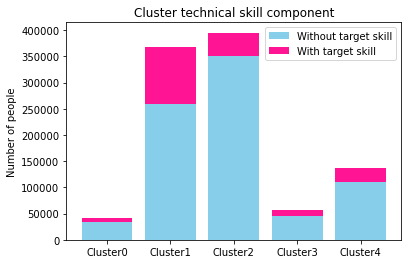

In [37]:
#Visualization for technical skill 

x = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
y1 = table4.iloc[:,0] #No related skill
y2 = table4.iloc[:,1] #Yes related skill 
plt.bar(x, y1, color='skyblue')
plt.bar(x, y2, bottom=y1, color='deeppink')

plt.ylabel('Number of people')
plt.title('Cluster technical skill component')
plt.legend( ('Without target skill', 'With target skill') )
plt.show()

In [38]:
table5 = pd.pivot_table(df, values=['international_stu_domestic','international_stu_international'],\
                    index=['label'],
                    aggfunc=np.sum)
table5

,international_stu_domestic,international_stu_international
label,,
0,39541.0,2512.0
1,335128.0,33121.0
2,388916.0,6208.0
3,53850.0,3463.0
4,122377.0,14884.0


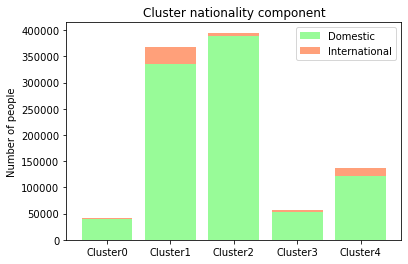

In [41]:
#Visualization for nationality

x = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
y1 = table5.iloc[:,0] #domestic 
y2 = table5.iloc[:,1] #international 
plt.bar(x, y1, color='palegreen')
plt.bar(x, y2, bottom=y1, color='lightsalmon')

plt.ylabel('Number of people')
plt.title('Cluster nationality component')
plt.legend( ('Domestic', 'International') )
plt.show()